In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from pandas.plotting import table

import sys

# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *


In [47]:
data =  {
    "Methods": ["MF [1]", "MLP [2]", "Paper's (zero-shot) [3]", "Paper's (few-shot) [3]", 
                "Thu's OpenAI embedding", "Thu's zero-shot GPT", "Thu's few-shot GPT", 
                "Thu's OpenAI embedding", "Thu's zero-shot GPT", "Thu's few-shot GPT", 
                "Thu's few-shot GPT (1 test/user)"],
    "Dataset": ["Unknown", "Unknown", "Unknown Amazon", "Unknown Amazon", "Small Amazon", 
                "Small Amazon", "Small Amazon", "Large Amazon", "Large Amazon", 
                "Large Amazon", "Large Amazon"],
    "Features": ["title", "title", "title", "title", "title", "title", "title", 
                 "title", "title", "title", "title"],
    "RMSE": [1.1973, 1.3078, 1.4059, 1.0751, 1.6036, 1.3351, 1.9086, 0.6240, 
             1.1344, 0.7185, 0.6445],
    "MAE": [0.9461, 0.9597, 1.1861, 0.6977, 1.1429, 1.2609, 1.0714, 0.3107, 
            1.0118, 0.3259, 0.2226],
    "Wall Time": ["-", "-", "-", "-", "47.9 ms", "13.6 s", "16.4 s", "1h 25min 35s", 
                  "13h 14min 39s", "9h 36min 7s", "15h 37s"]
}

# New rows to add to the DataFrame
new_rows = [
    {
        "Methods": "Thu's zero-shot GPT", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.413198999619531, 
        "MAE": 2.0, 
        "Wall Time": "4min 6s"
    },
    {
        "Methods": "Thu's few-shot GPT", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.5773740789526736, 
        "MAE": 1.7857142857142858, 
        "Wall Time": "1min 2s"
    },
    {
        "Methods": "Thu's few-shot GPT (1 test/user)", 
        "Dataset": "Small Amazon", 
        "Features": "all", 
        "RMSE": 2.5773740789526736, 
        "MAE": 1.7857142857142858, 
        "Wall Time": "31 s"
    }
]

# Convert the existing data dictionary to a DataFrame
df = pd.DataFrame(data)

# Append new rows to the DataFrame
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

# export table to latex
df.style.to_latex("../latex/amazon_table.tex")

# best RMSE & MAE
print(f'The best RMSE is {df["RMSE"].min()} and the best MAE is {df["MAE"].min()}')

df


The best RMSE is 0.624 and the best MAE is 0.2226


,Methods,Dataset,Features,RMSE,MAE,Wall Time
0,MF [1],Unknown,title,1.197300,0.946100,-
1,MLP [2],Unknown,title,1.307800,0.959700,-
2,Paper's (zero-shot) [3],Unknown Amazon,title,1.405900,1.186100,-
3,Paper's (few-shot) [3],Unknown Amazon,title,1.075100,0.697700,-
4,Thu's OpenAI embedding,Small Amazon,title,1.603600,1.142900,47.9 ms
5,Thu's zero-shot GPT,Small Amazon,title,1.335100,1.260900,13.6 s
6,Thu's few-shot GPT,Small Amazon,title,1.908600,1.071400,16.4 s
7,Thu's OpenAI embedding,Large Amazon,title,0.624000,0.310700,1h 25min 35s
8,Thu's zero-shot GPT,Large Amazon,title,1.134400,1.011800,13h 14min 39s
9,Thu's few-shot GPT,Large Amazon,title,0.718500,0.325900,9h 36min 7s


In [48]:
# Split the dataframe into small groups based on "Dataset" and "Features" and export table image

# Small Amazon
df_small = df[df["Dataset"] == "Small Amazon"]
df_small = df_small.drop(columns=["Dataset"])
df_small = df_small.set_index("Methods")
df_small = df_small.round(2)

# export table to latex
df_small.style.to_latex("../latex/small_amazon_table.tex")

# best RMSE & MAE
print(f'The best RMSE is {df_small["RMSE"].min()} and the best MAE is {df_small["MAE"].min()}')

df_small

The best RMSE is 1.34 and the best MAE is 1.07


,Features,RMSE,MAE,Wall Time
Methods,,,,
Thu's OpenAI embedding,title,1.60,1.14,47.9 ms
Thu's zero-shot GPT,title,1.34,1.26,13.6 s
Thu's few-shot GPT,title,1.91,1.07,16.4 s
Thu's zero-shot GPT,all,2.41,2.00,4min 6s
Thu's few-shot GPT,all,2.58,1.79,1min 2s
Thu's few-shot GPT (1 test/user),all,2.58,1.79,31 s


In [46]:
# Large Amazon
df_large = df[df["Dataset"] == "Large Amazon"]
df_large = df_large.drop(columns=["Dataset"])
df_large = df_large.set_index("Methods")
df_large = df_large.round(2)

# best RMSE & MAE
print(f'The best RMSE is {df_large["RMSE"].min()} and the best MAE is {df_large["MAE"].min()}')

# export table latex
df_large.style.to_latex("../latex/amazon_table_large.tex")

df_large

The best RMSE is 0.62 and the best MAE is 0.22


,Features,RMSE,MAE,Wall Time
Methods,,,,
Thu's OpenAI embedding,title,0.62,0.31,1h 25min 35s
Thu's zero-shot GPT,title,1.13,1.01,13h 14min 39s
Thu's few-shot GPT,title,0.72,0.33,9h 36min 7s
Thu's few-shot GPT (1 test/user),title,0.64,0.22,15h 37s


In [52]:
# Baseline Unknown or Unknown Amazon
df_baseline = df[(df["Dataset"] == "Unknown") | (df["Dataset"] == "Unknown Amazon")]
df_baseline = df_baseline.drop(columns=["Dataset"])
df_baseline = df_baseline.set_index("Methods")
df_baseline = df_baseline.round(2)

# export table latex
df_baseline.style.to_latex("../latex/baseline_table.tex")

df_baseline

,Features,RMSE,MAE,Wall Time
Methods,,,,
MF [1],title,1.20,0.95,-
MLP [2],title,1.31,0.96,-
Paper's (zero-shot) [3],title,1.41,1.19,-
Paper's (few-shot) [3],title,1.08,0.70,-


In [20]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

# Table from DataFrame
tab = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Adjust table
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)

plt.box(on=None)

# Save the figure as an image
image_path = "../images/evaluation_table.png"
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Close the plt object to prevent it from displaying in the output cell
plt.close()


Plot saved


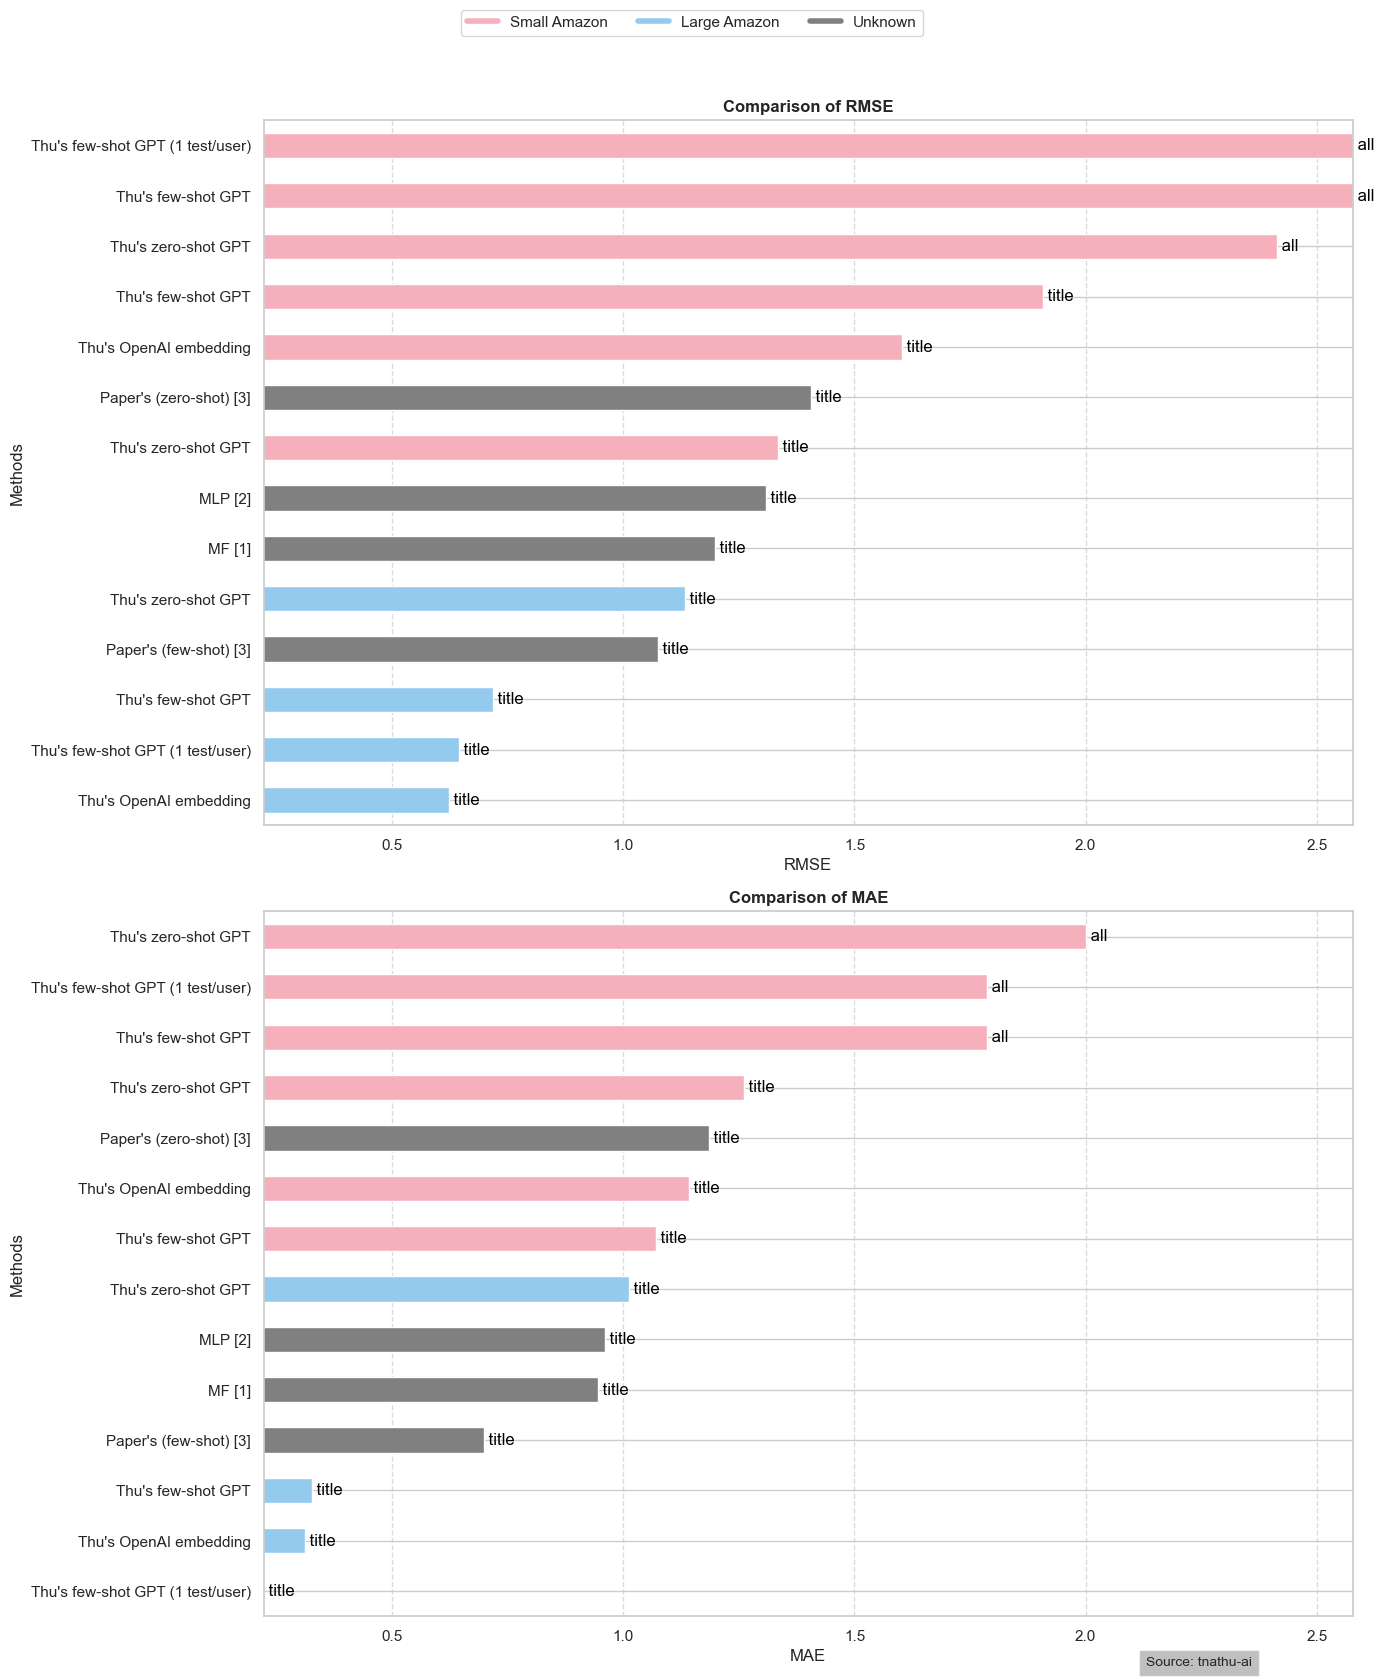

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
base_palette = sns.color_palette("husl", 3)
small_amazon_base_color = base_palette[0]  # Base color for Small Amazon
large_amazon_base_color = base_palette[2]  # Base color for Large Amazon

# Create lighter colors
small_amazon_color = sns.light_palette(small_amazon_base_color, n_colors=3)[-2]  # Lighter color for Small Amazon
large_amazon_color = sns.light_palette(large_amazon_base_color, n_colors=3)[-2]  # Lighter color for Large Amazon

# Create a color map: a dictionary that maps each unique value in 'Dataset' to a color
color_map = {'Small Amazon': small_amazon_color, 'Large Amazon': large_amazon_color}

# Assuming 'df' is your DataFrame and it has columns named 'Dataset', 'RMSE', 'MAE', and 'Methods'
# Map the 'Dataset' column to colors using the color map, handling NaN values
df['color'] = df['Dataset'].map(color_map).fillna("grey")  # Grey color for NaN values

# Update the max and min scale of RMSE and MAE
max_rmse_mae = max(df['RMSE'].max(), df['MAE'].max())
min_rmse_mae = min(df['RMSE'].min(), df['MAE'].min())

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 16))

# RMSE Plot
df.sort_values(by="RMSE").plot.barh(x="Methods", y="RMSE", ax=ax[0], legend=False, color=df.sort_values(by="RMSE")['color'])
ax[0].set_title("Comparison of RMSE", fontweight='bold')
ax[0].set_xlabel("RMSE")
ax[0].set_ylabel("Methods")
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="RMSE")['RMSE']):
    ax[0].text(value, index, ' ' + df.sort_values(by="RMSE")['Features'].iloc[index], color='black', va="center")

# MAE Plot
df.sort_values(by="MAE").plot.barh(x="Methods", y="MAE", ax=ax[1], legend=False, color=df.sort_values(by="MAE")['color'])
ax[1].set_title("Comparison of MAE", fontweight='bold')
ax[1].set_xlabel("MAE")
ax[1].set_ylabel("Methods")
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].set_xlim([min_rmse_mae, max_rmse_mae])

# Add features as text next to each bar
for index, value in enumerate(df.sort_values(by="MAE")['MAE']):
    ax[1].text(value, index, ' ' + df.sort_values(by="MAE")['Features'].iloc[index], color='black', va="center")

# Add legend
legend_elements = [Line2D([0], [0], color=small_amazon_color, lw=4, label='Small Amazon'),
                   Line2D([0], [0], color=large_amazon_color, lw=4, label='Large Amazon'),
                   Line2D([0], [0], color='grey', lw=4, label='Unknown')]

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Citing the source to the right below the plot
plt.figtext(0.9, 0.01, "Source: tnathu-ai", ha="right", fontsize=10, bbox={"facecolor":"grey", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.savefig('../images/comparison_plot.png')
print("Plot saved")
plt.show()


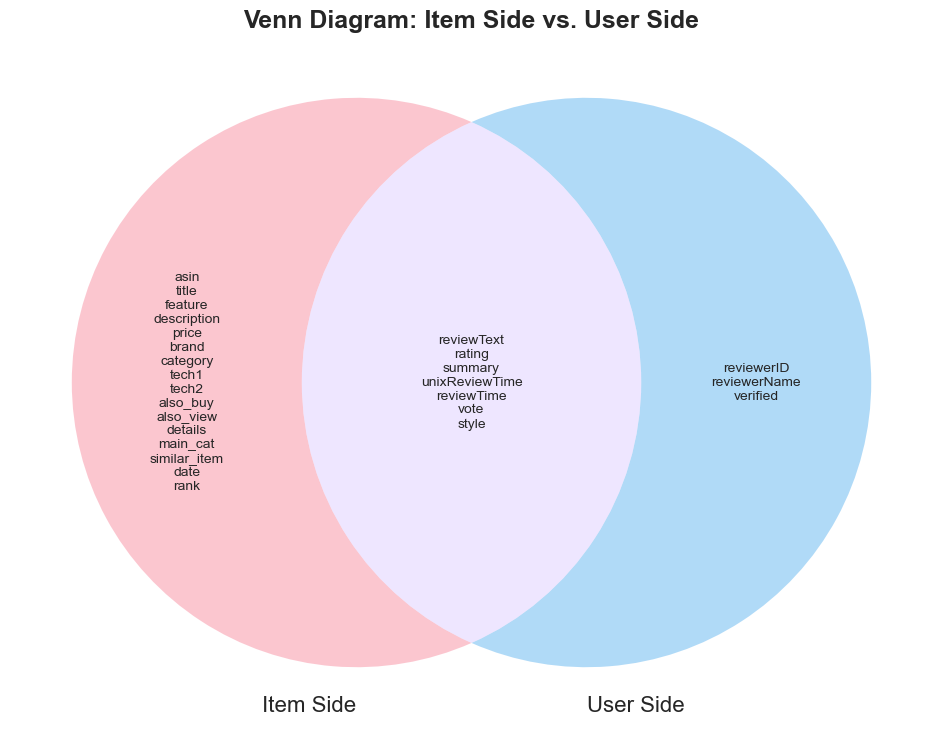

In [5]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette 
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
plt.show()


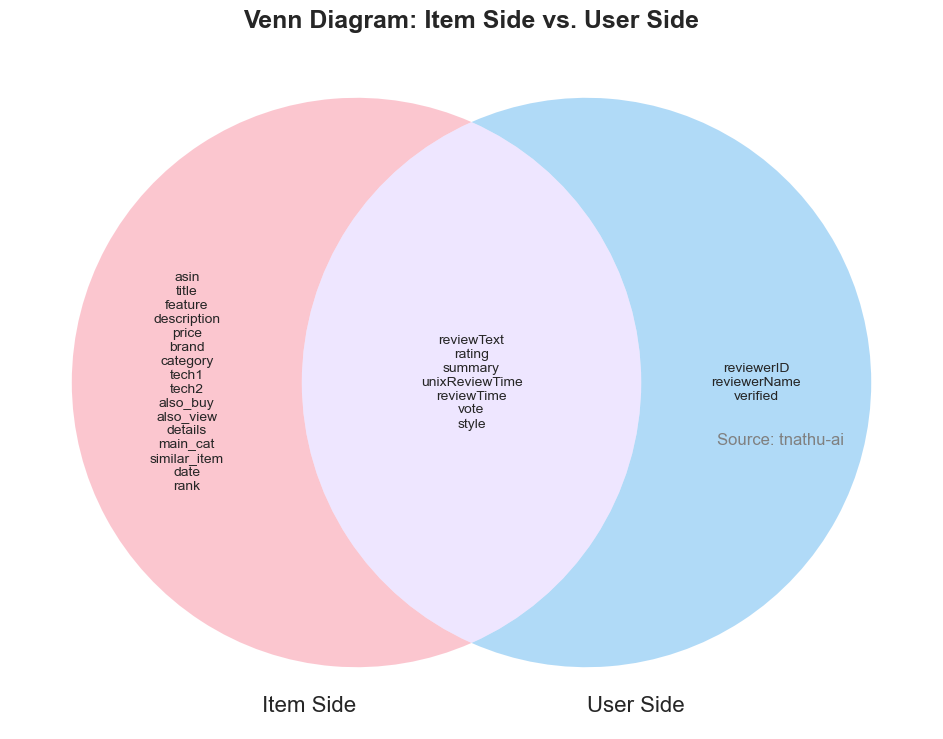

In [7]:
# Set the seaborn style
sns.set(style="whitegrid")

# Choose a colorblind-friendly palette that includes pink
palette = sns.color_palette("husl", 3)
item_color = palette[0]  # First color for item side
user_color = palette[2]  # Third color for user side (includes pink)

# Create the Venn diagram
plt.figure(figsize=(12, 9))
venn = venn2(subsets=(1, 1, 1), set_labels=("Item Side", "User Side"), set_colors=(item_color, user_color))

# Set the text size and make the title bold
for text in venn.set_labels:
    text.set_fontsize(16)
for text in venn.subset_labels:
    text.set_fontsize(10)

# Add data to the Venn diagram sectors
venn.get_label_by_id('10').set_text('\n'.join(ITEM_SIDE))
venn.get_label_by_id('01').set_text('\n'.join(USER_SIDE))
venn.get_label_by_id('11').set_text('\n'.join(INTERACTION_SIDE))

# Add the source citation in gray
plt.text(0.5, -0.1, "Source: tnathu-ai", fontsize=12, color='gray', ha='center')

# Display the Venn diagram
plt.title("Venn Diagram: Item Side vs. User Side", fontsize=18, fontweight='bold')
# plt.savefig('../images/interaction_venn_diagram.png')  # Save the plot
plt.show()
